In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [11]:
prob1 = np.load('/Users/antoineadam/git/NLPChallenge2021/code/models/ensemble_v1/estimation_holdout/roberta-large-test-425.npy')
prob2 = np.load('/Users/antoineadam/git/NLPChallenge2021/code/models/ensemble_v1/estimation_holdout/roberta-large-test-241.npy')
prob3 = np.load('/Users/antoineadam/git/NLPChallenge2021/code/models/BERT-large/bert-large-test-12.npy')
prob4 = np.load('/Users/antoineadam/git/NLPChallenge2021/code/models/BERT-large/bert-large-test-42.npy')

In [12]:
probs = prob1 + prob2 + prob3 + prob4
probs

array([[5.08248014e-03, 2.43101399e-02, 1.09646167e-03, ...,
        1.74950566e-02, 1.55864909e-01, 1.72442058e-03],
       [1.24403727e-04, 1.30804197e-03, 1.40412987e-04, ...,
        5.23635698e-03, 5.79362910e-04, 6.18481936e-05],
       [2.83378497e-04, 3.50377115e-04, 5.44738905e-05, ...,
        4.33965397e-05, 1.99406300e+01, 1.76884478e-05],
       ...,
       [1.11288238e-04, 2.48708739e-03, 8.76145932e-05, ...,
        1.09261906e-04, 1.52683596e-03, 1.03384467e-04],
       [3.77110009e-05, 1.02363614e-04, 1.73336975e-05, ...,
        5.08273697e-05, 2.52494181e-04, 9.34894924e-05],
       [7.25510909e-05, 1.74492758e-04, 4.77233079e-05, ...,
        4.68353173e-05, 7.81708513e-04, 9.86642614e-02]], dtype=float32)

In [5]:
PATH = '/Users/antoineadam/git/NLPChallenge2021/data/'

df = pd.read_json(PATH+'train.json').set_index('Id').loc[:, 'description']
labels = pd.read_csv(PATH+'train_label.csv', index_col=0).loc[:, 'Category'].astype('category').cat.codes

data_text, data_label = df.tolist(), labels.tolist()
trainval_texts, test_texts, trainval_labels, test_labels = train_test_split(data_text, data_label, 
                                                                            test_size=.2, 
                                                                            stratify=data_label, 
                                                                            random_state=42069)
#train_texts, val_texts, train_labels, val_labels = train_test_split(trainval_texts, trainval_labels, 
#                                                                    test_size=.1, 
#                                                                    stratify=trainval_labels, 
#                                                                    random_state=42)



In [17]:
y_pred = np.argmax(prob1, axis=1)

print(classification_report(test_labels, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6967    0.6990    0.6978       299
           1     0.8285    0.8396    0.8340       823
           2     0.7681    0.8413    0.8030       189
           3     0.7560    0.6709    0.7109      1829
           4     0.7674    0.8199    0.7928       161
           5     0.8325    0.8766    0.8540       924
           6     0.7984    0.8296    0.8137      2459
           7     0.8035    0.8081    0.8058       172
           8     0.8466    0.8012    0.8233      1323
           9     0.8216    0.8045    0.8130       624
          10     0.8693    0.8012    0.8339       166
          11     0.7965    0.7752    0.7857      2322
          12     0.8480    0.8506    0.8493       328
          13     0.7244    0.8190    0.7688       812
          14     0.8813    0.8737    0.8775      2525
          15     0.8161    0.8265    0.8213       859
          16     0.9490    0.9394    0.9442      1090
          17     0.7886    

In [27]:
from sklearn.metrics import confusion_matrix
M = confusion_matrix(test_labels, y_pred, normalize = 'true')

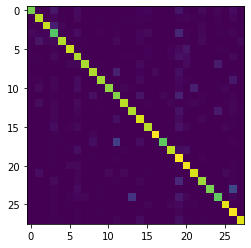

In [28]:
import matplotlib.pyplot as plt
plt.imshow(M)